In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime

In [3]:
df = pd.read_csv('http://localhost:8888/edit/Danya/mllab/film.csv', encoding='latin1')
print(df.head())

   Year Length                    Title Subject                Actor  \
0   INT    INT                   STRING     CAT                  CAT   
1  1990    111  Tie Me Up! Tie Me Down!  Comedy    Banderas, Antonio   
2  1991    113               High Heels  Comedy         Bosé, Miguel   
3  1983    104           Dead Zone, The  Horror  Walken, Christopher   
4  1979    122                     Cuba  Action        Connery, Sean   

           Actress           Director Popularity Awards            *Image  
0              CAT                CAT        INT   BOOL            STRING  
1  Abril, Victoria   Almodóvar, Pedro         68     No  NicholasCage.png  
2  Abril, Victoria   Almodóvar, Pedro         68     No  NicholasCage.png  
3    Adams, Brooke  Cronenberg, David         79     No  NicholasCage.png  
4    Adams, Brooke    Lester, Richard          6     No   seanConnery.png  


In [4]:
# Check for missing values
print(df.isnull().sum())

Year            0
Length         67
Title           0
Subject         2
Actor           8
Actress       378
Director      253
Popularity      6
Awards          0
*Image          0
dtype: int64


In [5]:
# Handle missing values
# For numerical columns, fill missing values with the mean
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [6]:
# For categorical columns, fill missing values with 'Unknown'
categorical_cols = df.select_dtypes(include=[object]).columns
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

In [7]:
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')

# Reject outliers as before
Q1 = df['Popularity'].quantile(0.25)
Q3 = df['Popularity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Popularity'] >= lower_bound) & (df['Popularity'] <= upper_bound)]

df.head()

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards,*Image
1,1990,111,Tie Me Up! Tie Me Down!,Comedy,"Banderas, Antonio","Abril, Victoria","Almodóvar, Pedro",68.0,No,NicholasCage.png
2,1991,113,High Heels,Comedy,"Bosé, Miguel","Abril, Victoria","Almodóvar, Pedro",68.0,No,NicholasCage.png
3,1983,104,"Dead Zone, The",Horror,"Walken, Christopher","Adams, Brooke","Cronenberg, David",79.0,No,NicholasCage.png
4,1979,122,Cuba,Action,"Connery, Sean","Adams, Brooke","Lester, Richard",6.0,No,seanConnery.png
5,1978,94,Days of Heaven,Drama,"Gere, Richard","Adams, Brooke","Malick, Terrence",14.0,No,NicholasCage.png


In [8]:

df['Year'] = pd.to_datetime(df['Year'], errors='coerce')

df.head()

,Year,Length,Title,Subject,Actor,Actress,Director,Popularity,Awards,*Image
1,1990-01-01,111,Tie Me Up! Tie Me Down!,Comedy,"Banderas, Antonio","Abril, Victoria","Almodóvar, Pedro",68.0,No,NicholasCage.png
2,1991-01-01,113,High Heels,Comedy,"Bosé, Miguel","Abril, Victoria","Almodóvar, Pedro",68.0,No,NicholasCage.png
3,1983-01-01,104,"Dead Zone, The",Horror,"Walken, Christopher","Adams, Brooke","Cronenberg, David",79.0,No,NicholasCage.png
4,1979-01-01,122,Cuba,Action,"Connery, Sean","Adams, Brooke","Lester, Richard",6.0,No,seanConnery.png
5,1978-01-01,94,Days of Heaven,Drama,"Gere, Richard","Adams, Brooke","Malick, Terrence",14.0,No,NicholasCage.png


In [9]:
df.columns

Index(['Year', 'Length', 'Title', 'Subject', 'Actor', 'Actress', 'Director',
       'Popularity', 'Awards', '*Image'],
      dtype='object')

In [10]:
# Assuming that we want to normalize 'Popularity' since there is no 'Budget':
df['Popularity'] = (df['Popularity'] - df['Popularity'].min()) / (df['Popularity'].max() - df['Popularity'].min())

# Display the first few rows of the dataframe after normalization
print(df.head())

        Year Length                    Title Subject                Actor  \
1 1990-01-01    111  Tie Me Up! Tie Me Down!  Comedy    Banderas, Antonio   
2 1991-01-01    113               High Heels  Comedy         Bosé, Miguel   
3 1983-01-01    104           Dead Zone, The  Horror  Walken, Christopher   
4 1979-01-01    122                     Cuba  Action        Connery, Sean   
5 1978-01-01     94           Days of Heaven   Drama        Gere, Richard   

           Actress           Director  Popularity Awards            *Image  
1  Abril, Victoria   Almodóvar, Pedro    0.772727     No  NicholasCage.png  
2  Abril, Victoria   Almodóvar, Pedro    0.772727     No  NicholasCage.png  
3    Adams, Brooke  Cronenberg, David    0.897727     No  NicholasCage.png  
4    Adams, Brooke    Lester, Richard    0.068182     No   seanConnery.png  
5    Adams, Brooke   Malick, Terrence    0.159091     No  NicholasCage.png  


In [11]:
# Handle duplicate entries
df = df.drop_duplicates()

In [12]:
print(df.head())

        Year Length                    Title Subject                Actor  \
1 1990-01-01    111  Tie Me Up! Tie Me Down!  Comedy    Banderas, Antonio   
2 1991-01-01    113               High Heels  Comedy         Bosé, Miguel   
3 1983-01-01    104           Dead Zone, The  Horror  Walken, Christopher   
4 1979-01-01    122                     Cuba  Action        Connery, Sean   
5 1978-01-01     94           Days of Heaven   Drama        Gere, Richard   

           Actress           Director  Popularity Awards            *Image  
1  Abril, Victoria   Almodóvar, Pedro    0.772727     No  NicholasCage.png  
2  Abril, Victoria   Almodóvar, Pedro    0.772727     No  NicholasCage.png  
3    Adams, Brooke  Cronenberg, David    0.897727     No  NicholasCage.png  
4    Adams, Brooke    Lester, Richard    0.068182     No   seanConnery.png  
5    Adams, Brooke   Malick, Terrence    0.159091     No  NicholasCage.png  


In [13]:
df.to_csv('cleaned_film.csv', index=False)

In [14]:
#descriptive statistics for numerical columns
numerical_summary = df.describe(exclude=[np.datetime64]).T
numerical_summary['range'] = numerical_summary['max'] - numerical_summary['min']

#the variance for numerical columns, excluding datetime columns
numerical_variance = df.select_dtypes(include=[np.number]).var()
numerical_summary['var'] = numerical_variance

#mode for numerical columns, excluding datetime columns
numerical_mode = df.select_dtypes(include=[np.number]).mode().iloc[0]

# Ensure that mode is added as a new column
numerical_summary['mode'] = numerical_mode

# Printing the modified summary
print(numerical_summary[['mean', '50%', 'mode', 'std', 'var', 'range']])

                mean       50%      mode       std       var range
Length           NaN       NaN       NaN       NaN       NaN   NaN
Title            NaN       NaN       NaN       NaN       NaN   NaN
Subject          NaN       NaN       NaN       NaN       NaN   NaN
Actor            NaN       NaN       NaN       NaN       NaN   NaN
Actress          NaN       NaN       NaN       NaN       NaN   NaN
Director         NaN       NaN       NaN       NaN       NaN   NaN
Popularity  0.489888  0.488636  0.090909  0.303948  0.092384   1.0
Awards           NaN       NaN       NaN       NaN       NaN   NaN
*Image           NaN       NaN       NaN       NaN       NaN   NaN


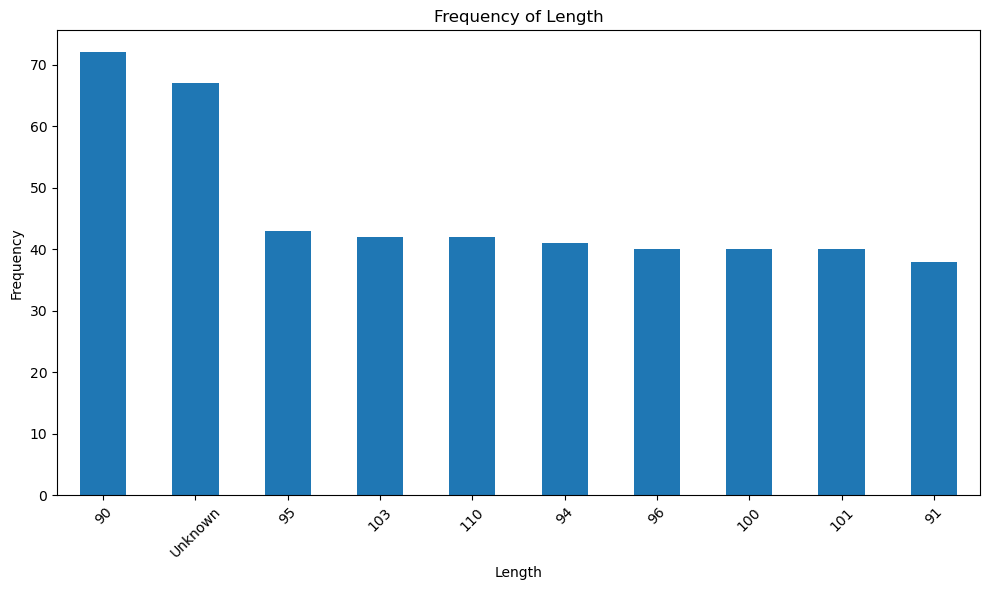

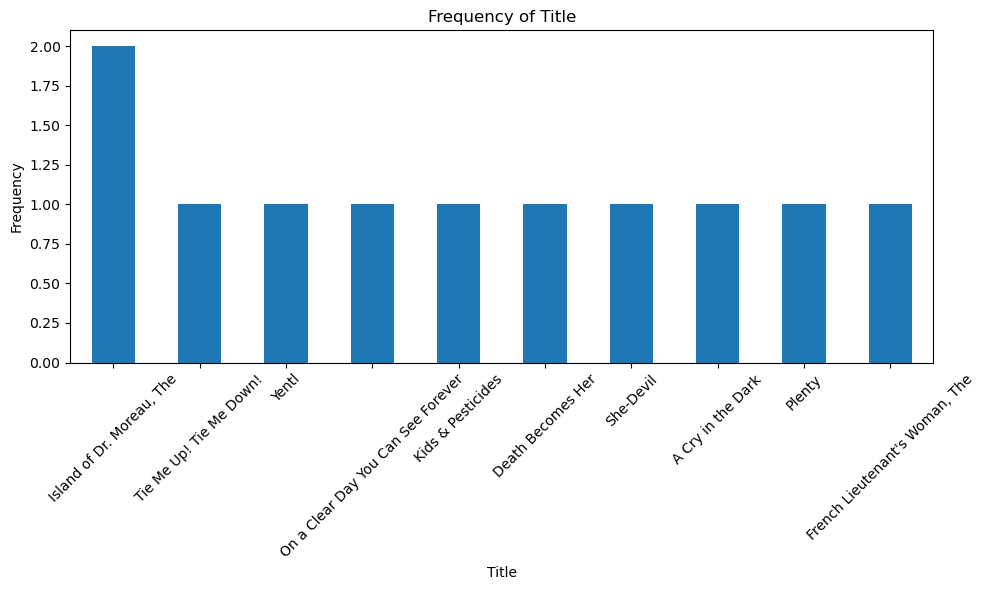

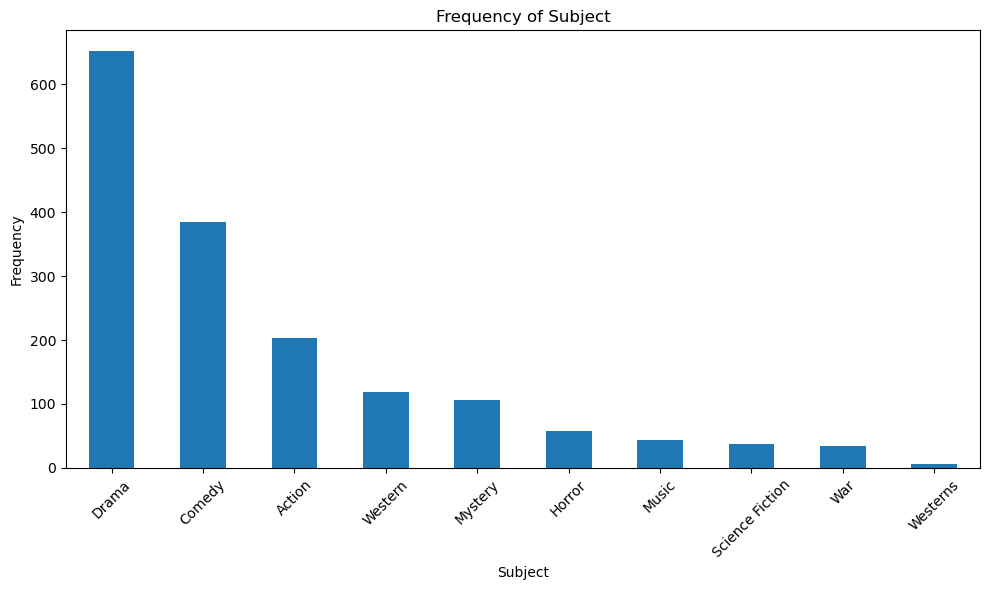

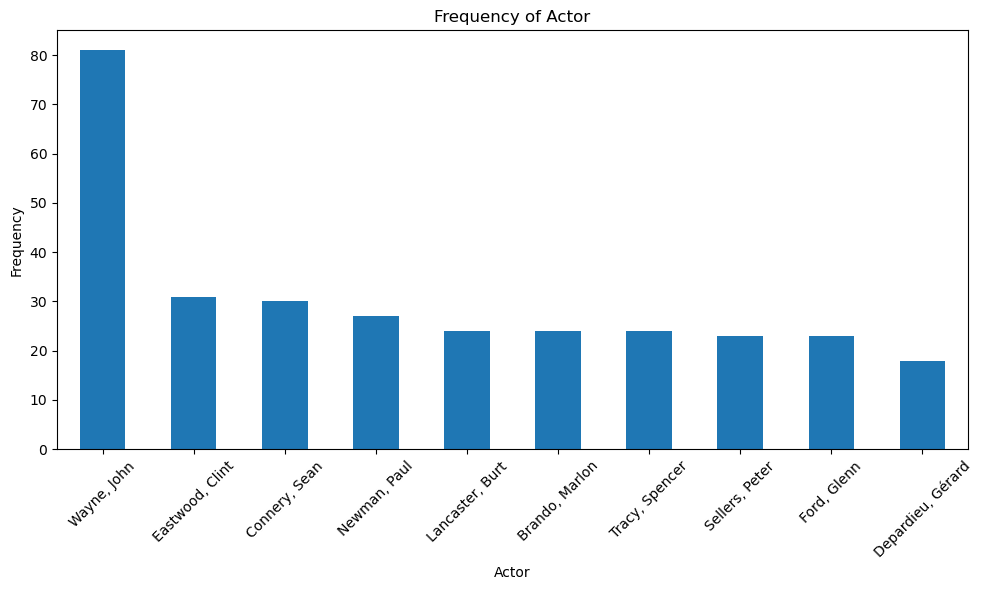

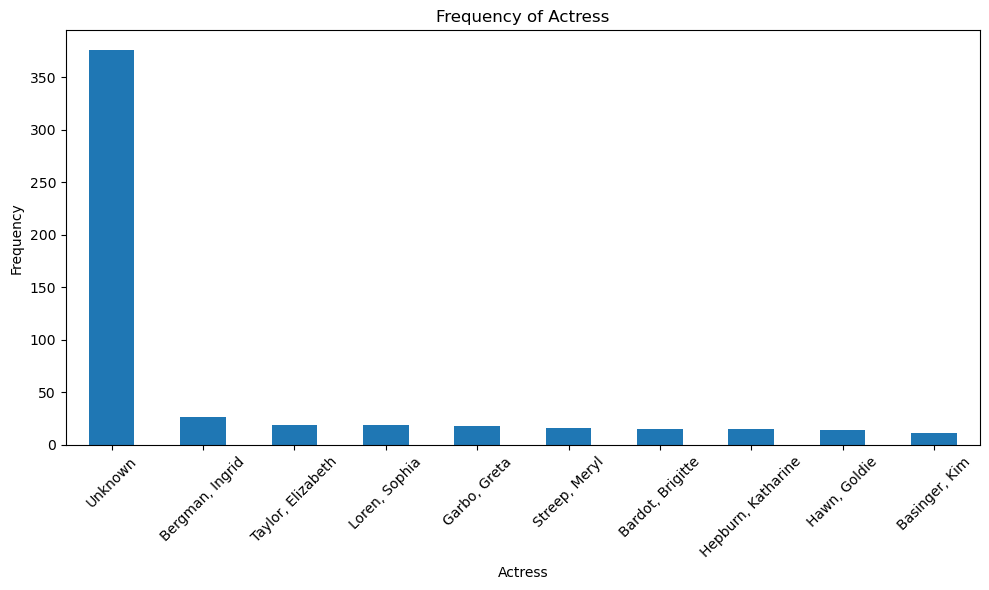

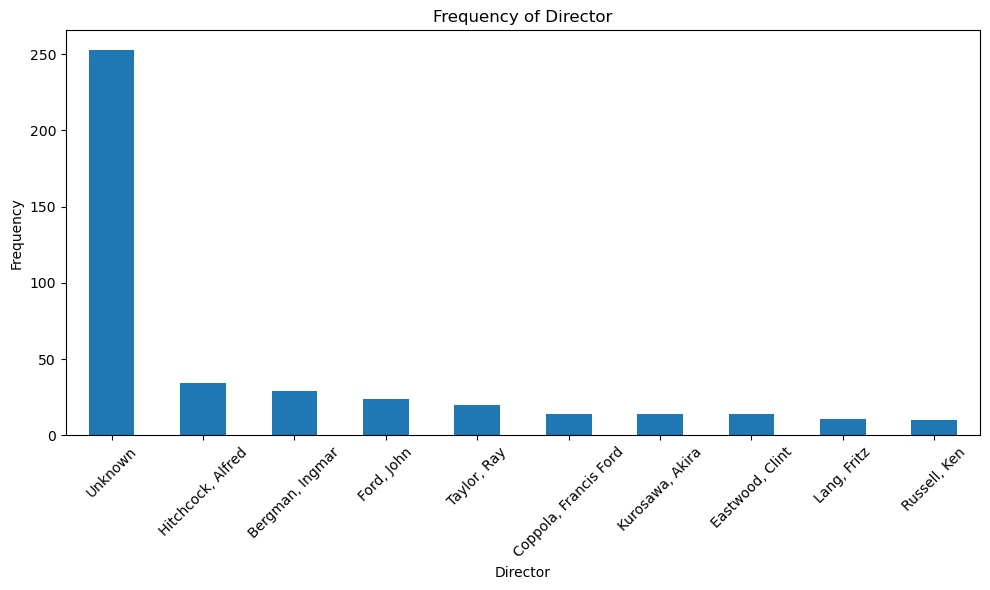

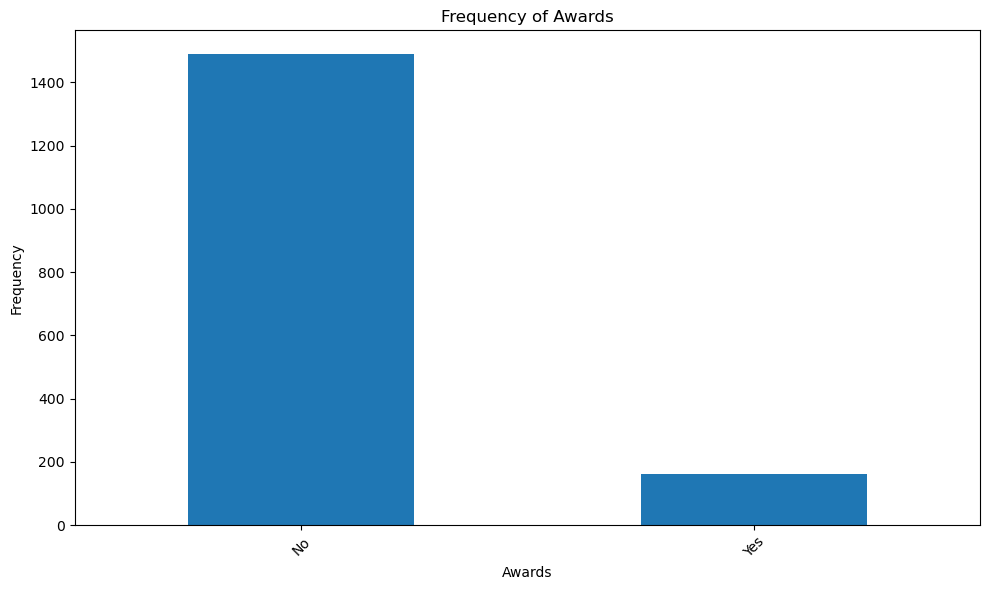

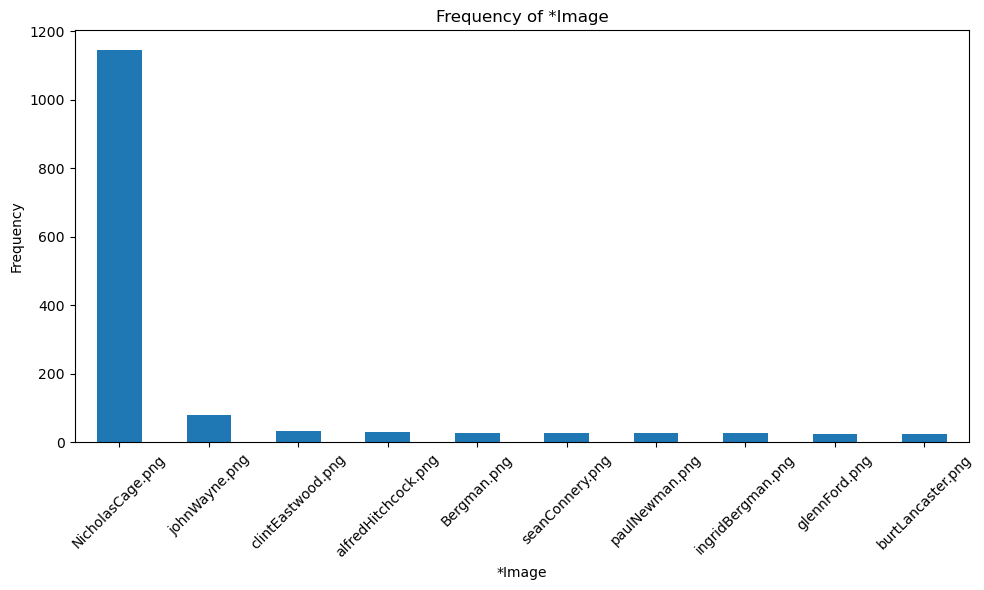

In [15]:
import matplotlib.pyplot as plt

# Frequency tables for categorical columns
categorical_cols = df.select_dtypes(include=[object]).columns
frequency_tables = {col: df[col].value_counts() for col in categorical_cols}

# Plot bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().nlargest(10).plot(kind='bar')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

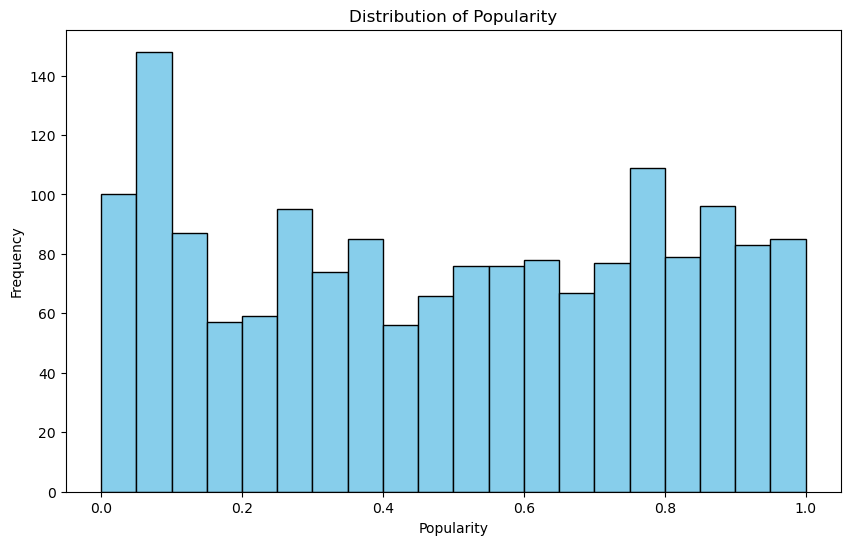

In [16]:
import matplotlib.pyplot as plt

# Histogram for 'Popularity'
plt.figure(figsize=(10, 6))
df['Popularity'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

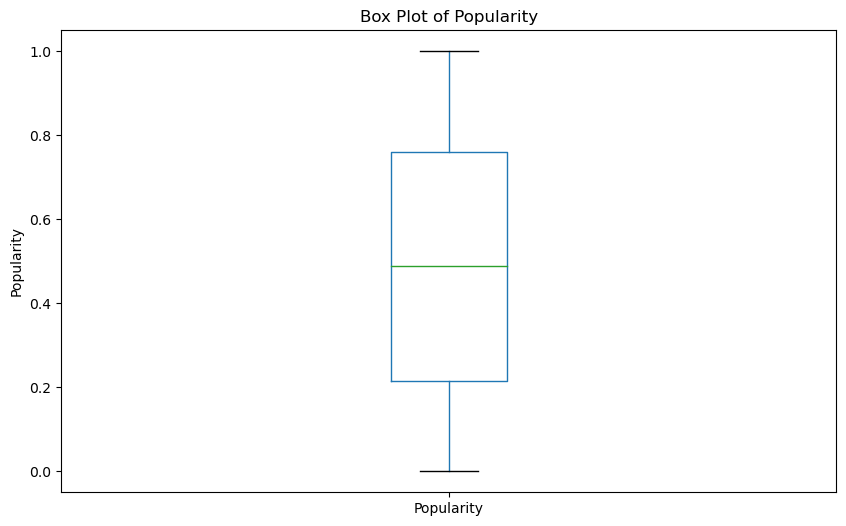

In [17]:
# Box plot for 'Popularity'
plt.figure(figsize=(10, 6))
df.boxplot(column='Popularity')
plt.title('Box Plot of Popularity')
plt.ylabel('Popularity')
plt.grid(False)
plt.show()

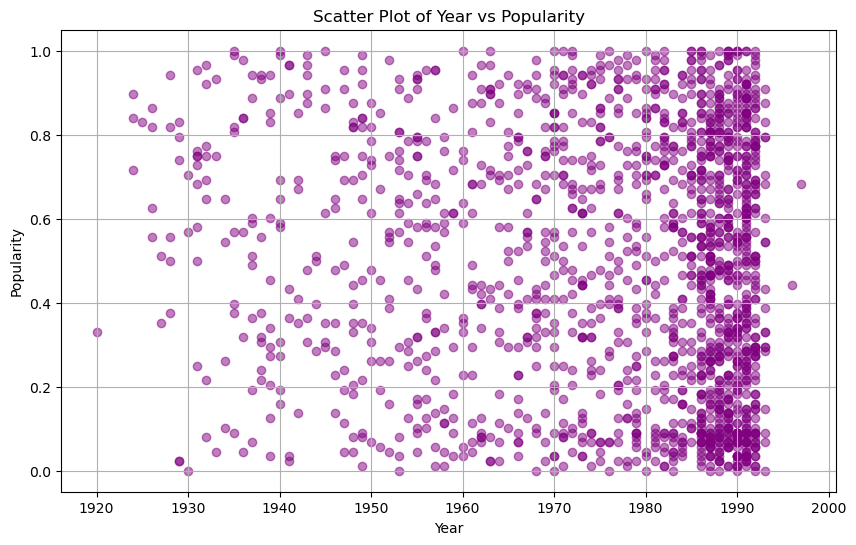

In [18]:
# Scatter plot for 'Year' vs 'Popularity'
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'].dt.year, df['Popularity'], alpha=0.5, color='purple')
plt.title('Scatter Plot of Year vs Popularity')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

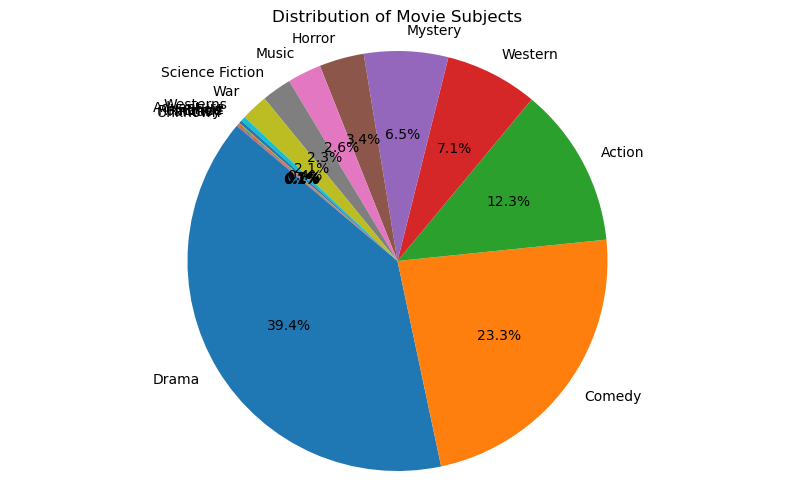

In [19]:
# Pie chart for 'Subject' column
subject_counts = df['Subject'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(subject_counts, labels=subject_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movie Subjects')
plt.axis('equal')
plt.show()

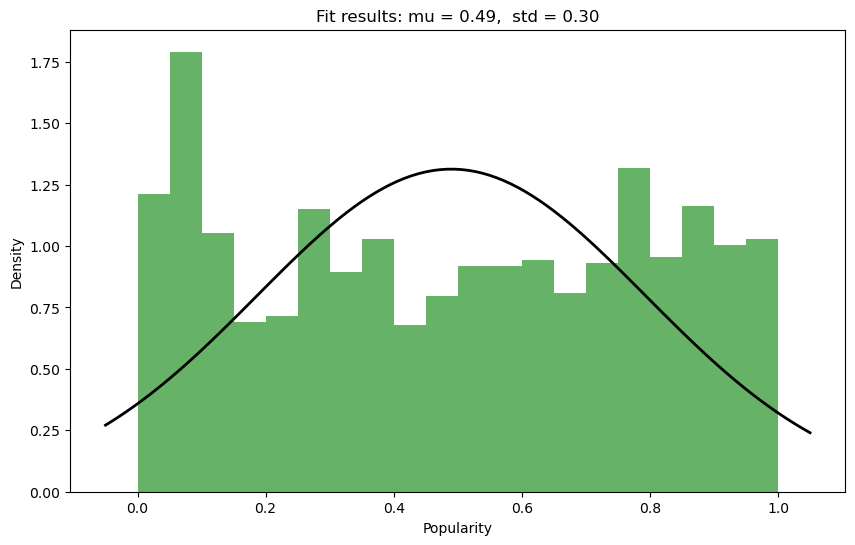

In [20]:
from scipy.stats import norm, poisson
import numpy as np

popularity_data = df['Popularity'].dropna()


mu, std = norm.fit(popularity_data)

plt.figure(figsize=(10, 6))
plt.hist(popularity_data, bins=20, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Fit results: mu = %.2f,  std = %.2f' % (mu, std))
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.show()

In [21]:
from scipy.stats import norm

# Calculating the mean and standard error for 'Popularity'
popularity_mean = df['Popularity'].mean()
popularity_std = df['Popularity'].std()

# Calculating the 95% confidence interval for the mean of 'Popularity'
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * (popularity_std / (len(df['Popularity']) ** 0.5))
confidence_interval_popularity = (popularity_mean - margin_of_error, popularity_mean + margin_of_error)

confidence_interval_popularity

(0.47523506857353853, 0.5045399960472611)

In [22]:
# Calculating the proportion of movies in each genre ('Subject')
subject_proportions = df['Subject'].value_counts(normalize=True)

# Calculating the 95% confidence interval for the proportion of the most common genre
most_common_genre = subject_proportions.idxmax()
proportion = subject_proportions.max()

# Calculating the standard error for the proportion
std_error_proportion = (proportion * (1 - proportion) / len(df)) ** 0.5

# Calculating the 95% confidence interval for the proportion
margin_of_error_proportion = z_score * std_error_proportion
confidence_interval_proportion = (proportion - margin_of_error_proportion, proportion + margin_of_error_proportion)

most_common_genre, confidence_interval_proportion

('Drama', (0.37087412517749513, 0.4179945983554752))

In [23]:
from scipy.stats import f_oneway

# Extracting popularity scores for each genre
popularity_by_genre = [group['Popularity'].values for name, group in df.groupby('Subject')]

# Performing ANOVA test to check if there's a significant difference in average popularity between genres
anova_result = f_oneway(*popularity_by_genre)
anova_result

F_onewayResult(statistic=0.9757963307705488, pvalue=0.47840727225851154)